In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random as rnd
import math as m
import pandas as pd
import scipy.stats as stat
import scipy.optimize as opt
import seaborn as sb
from scipy.integrate import quad
from scipy.integrate import dblquad
from scipy.special import comb
from sklearn.linear_model import LinearRegression
plt.style.use('ggplot')

my_norm = lambda exp, disp: stat.norm(loc = exp, scale = m.sqrt(disp))
from mpmath import mp
#from mpmath import e

# 1
Bern(p), $p \in \{1/10,...,8/10\}$


$a = p$

$\sigma^2 = p (1-p)$

${\bf E} |\xi_1 - a|^3 = p * (1-p)^3 + (1-p)* (p^3)$ 

$\dfrac{\sigma^3}{{\bf E} |\xi_1 - a|^3} = \dfrac{p^{3/2}(1-p)^{3/2}}{p * (1-p)^3 + (1-p)* (p^3)}$
$= \dfrac{p^{1/2}(1-p)^{1/2}}{ (1-p)^2 + (p^2)}$
$= \dfrac{p^{1/2}(1-p)^{1/2}}{ 2p^2 - 2p +1}$

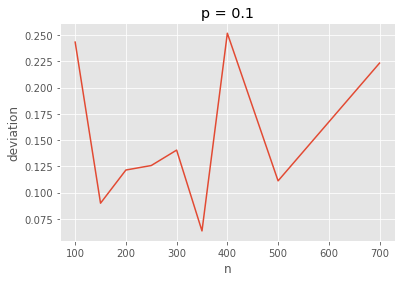

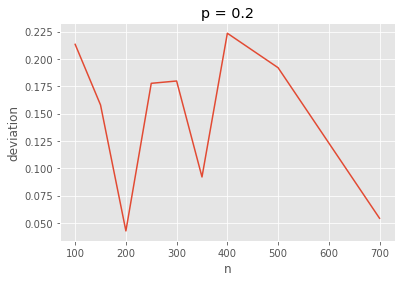

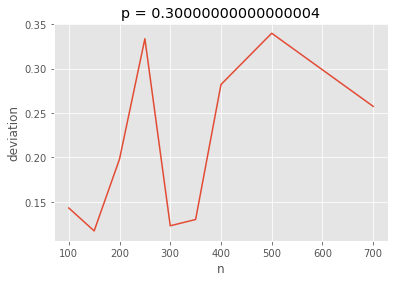

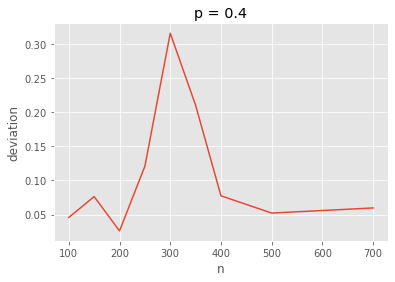

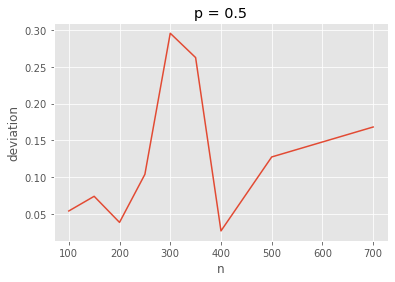

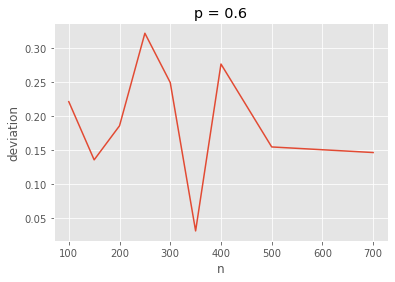

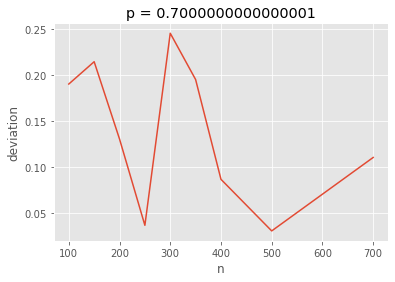

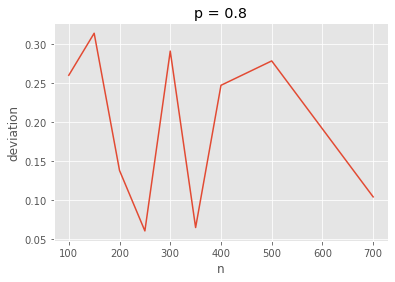

In [27]:
for p in np.linspace(0.1, 0.8, 8):
    sups = []
    nlist = [100, 150, 200, 250, 300, 350, 400, 500, 700]
    for n in nlist:
        a = p
        sigma = m.sqrt(p*(1-p))
        sup1 = np.max([abs(stat.binom(n, p).cdf(x * sigma * m.sqrt(n) + n * a) - stat.norm().cdf(x))\
                        for x in np.linspace(-m.sqrt(n) * a / sigma, (1-a)*m.sqrt(n)/sigma, n)])
        sup2 = sup1 = np.max([abs(stat.binom(n, p).cdf(x * sigma * m.sqrt(n) + n * a) - stat.norm().cdf(x))\
                        for x in np.linspace(-m.sqrt(n) * a / sigma, (1-a)*m.sqrt(n)/sigma, n)-1**(-10)])
        
        sup = np.max([sup1, sup2])
        sups.append(sup * m.sqrt(n) *  sigma / (2*p*p - 2 * p +1))
        
    plt.plot(nlist, sups)
    plt.xlabel('n')
    plt.ylabel('deviation')
    plt.title('p = '+str(p))
    plt.show()

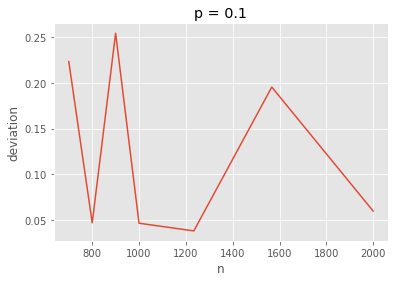

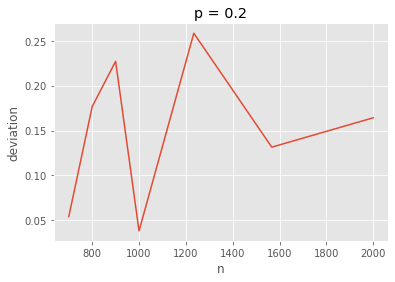

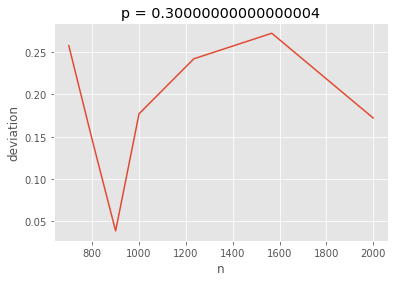

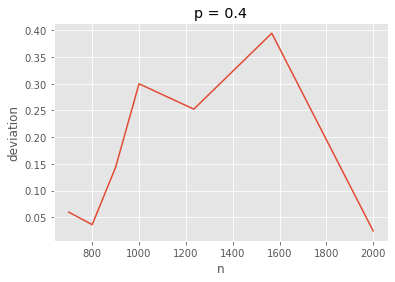

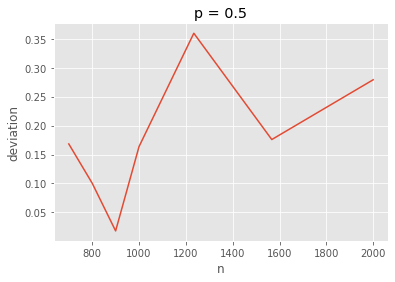

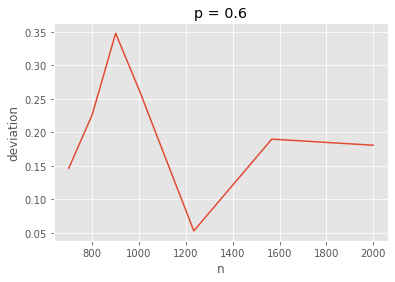

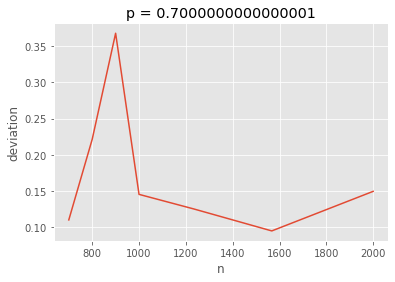

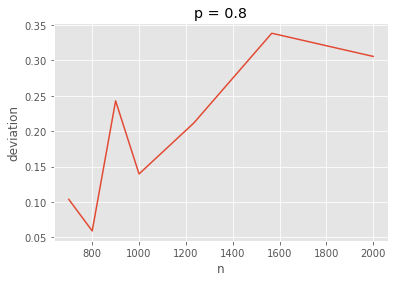

In [28]:
for p in np.linspace(0.1, 0.8, 8):
    sups = []
    nlist = [ 700, 800, 900, 1000, 1234, 1567, 2000]
    for n in nlist:
        a = p
        sigma = m.sqrt(p*(1-p))
        sup1 = np.max([abs(stat.binom(n, p).cdf(x * sigma * m.sqrt(n) + n * a) - stat.norm().cdf(x))\
                        for x in np.linspace(-m.sqrt(n) * a / sigma, (1-a)*m.sqrt(n)/sigma, n)])
        sup2 = sup1 = np.max([abs(stat.binom(n, p).cdf(x * sigma * m.sqrt(n) + n * a) - stat.norm().cdf(x))\
                        for x in np.linspace(-m.sqrt(n) * a / sigma, (1-a)*m.sqrt(n)/sigma, n)-1**(-10)])
        
        sup = np.max([sup1, sup2])
        sups.append(sup * m.sqrt(n) *  sigma / (2*p*p - 2 * p +1))
        
    plt.plot(nlist, sups)
    plt.xlabel('n')
    plt.ylabel('deviation')
    plt.title('p = '+str(p))
    plt.show()

# 2, смотри в коллаб 
R[0, 1] -- сложно

$a = 1/2$

$\sigma^2 = 1/12$

${\bf E} |\xi_1 - a|^3 = 1/32$ 

$\dfrac{\sigma^3}{{\bf E} |\xi_1 - a|^3} = \dots$

In [6]:
from sympy.stats import UniformSum, density
from sympy import pprint
#ненавижу симпай

In [100]:
def MixedProd(n,k,x):
    prod = 1
    for i in range(1,n):
        prod *= ((x - k)/(n-i))
        
    return prod
def UniformSumPdf(n, x):
    if x <= 0 or x >= n:
        return 0;
    
    summa = 0;
    for k in range(m.floor(x)+1):
        summa += ((-1)**k * comb(n,k) * MixedProd(n,k,x))
    #for i in range(1, n):
    #    summa /= i;
    return summa
def UniformSumCdf(n, x):
    if x <= 0:
        return 0;
    if x >= n:
        return 1;

    integrand = lambda y: UniformSumPdf(n, y)
    if x < n * 0.95:
        return quad(integrand, 0, x, epsabs = 1e-3, epsrel = 1e-3)[0]
    else:
        return 1 - quad(integrand, x, n, epsabs = 1e-3, epsrel = 1e-3)[0]

In [79]:
n = 50
#plt.plot(np.linspace(-1,51, 50), [abs(UniformSumCdf(n, x * sigma * m.sqrt(n) + n * a) - stat.norm().cdf(x))\
#                    for x in np.linspace(-1, 51, 50)])
print([abs(UniformSumCdf(n, x * sigma * m.sqrt(n) + n * a) - stat.norm().cdf(x))\
                    for x in np.linspace(-1, 51, 50)])
print([(n, x * sigma * m.sqrt(n) + n * a) for x in np.linspace(-1, 51, 50)])

<ipython-input-78-65174844dc3a>:24: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  return 1 - quad(integrand, x, n, epsabs = 1e-3)[0]
<ipython-input-78-65174844dc3a>:24: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  return 1 - quad(integrand, x, n, epsabs = 1e-3)[0]


[0.00048707179709792103, 12599634414.681602, 9240458868.821356, 34935311777.15052, 9026507133.40941, 22737713493.559128, 16693263091.997463, 29531206960.970966, 14407226028.28775, 8333896929.402211, 14266732928.229313, 11800183281.021206, 7101265731.500362, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[(50, 22.958758547680684), (50, 25.12497396646853), (50, 27.291189385256374), (50, 29.457404804044216), (50, 31.623620222832063), (50, 33.78983564161991), (50, 35.95605106040775), (50, 38.1222664791956), (50, 40.288481897983445), (50, 42.45469731677129), (50, 44.62091273555913), (50, 46.78712815434697), (50, 48.953343573134816), (50, 51.11955899192266), (50, 53.285774410710516), (50, 55.45198982949836), (50, 57.6182052482862), (50, 59.784420667074045), (50, 61.950636085861895), (50, 64.11685150464973), (50, 66.28306692343759), (50, 68.44928234222542),

<ipython-input-94-85d52d0dbc1a>:25: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  return quad(integrand, 0, x, epsabs = 1e-3)[0]
<ipython-input-94-85d52d0dbc1a>:25: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  return quad(integrand, 0, x, epsabs = 1e-3)[0]
<ipython-input-94-85d52d0dbc1a>:27: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be d

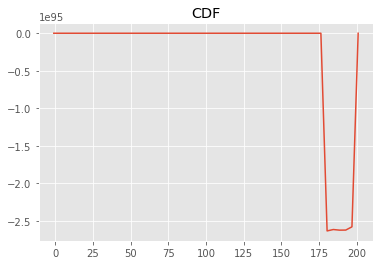

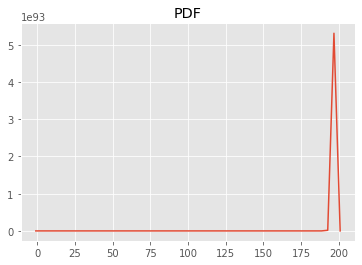

In [96]:
n = 200
plt.plot(np.linspace(-1, n+1, 50), [UniformSumCdf(n, x) for x in np.linspace(-1, n+1, 50)])
plt.title('CDF'); plt.show();
plt.plot(np.linspace(-1, n+1, 50), [UniformSumPdf(n, x) for x in np.linspace(-1, n+1, 50)])
plt.title('PDF'); plt.show();

# Это полный провал ^^^

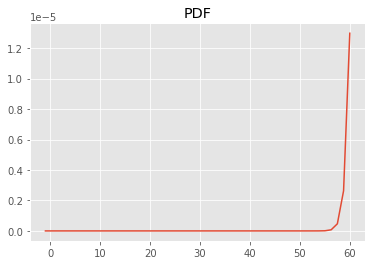

In [110]:
n = 150
#plt.plot(np.linspace(-1, n+1, 50), [UniformSumPdf(n, x) for x in np.linspace(-1, n+1, 50)])
#plt.title('PDF'); plt.show();
plt.plot(np.linspace(-1, 60, 50), [UniformSumPdf(n, x) for x in np.linspace(-1, 60, 50)])
plt.title('PDF'); plt.show();

In [14]:
from sympy import * #риск - дело багородное
from sympy.stats import UniformSum, density, cdf
from sympy.utilities.lambdify import lambdify, implemented_function


x = symbols('x')
z = symbols('z')
m = symbols('m')
n = 5
expr = cdf(UniformSum("x", 5), evaluate=False)(z).evalf(subs = {z : 4.9, m : n})

float(expr)
def SympyCdf(n, z):
    return float(cdf(UniformSum("x", 5), evaluate=False)(z).evalf(subs = {z : 4.9, m : n}))

In [16]:
SympyCdf(5, 4.9)

0.9999999166666625

In [21]:
import math as m
sups = []
nlist = [100, 150]#, 250, 300, 350, 400, 500, 700, 1000]
a = 0.5
sigma = m.sqrt(1/12)
for n in nlist:
    sup = np.max([abs(SympyCdf(n, x * sigma * m.sqrt(n) + n * a) - stat.norm().cdf(x))\
                    for x in np.linspace(-m.sqrt(n)/sigma * a, m.sqrt(n), 3 * m.floor(m.sqrt(n)))])
    
    sups.append(sup * m.sqrt(n) *  sigma**3  * 32)
        
plt.plot(nlist, sups)
plt.xlabel('n')
plt.ylabel('deviation')
plt.title('R[0, 1]')
plt.show()
print(sups)

KeyboardInterrupt: 

# 3
$\exp(1)$

$a = 1$

$\sigma^2 = 1$

${\bf E} |\xi_1 - a|^3 = \dfrac{2 (6-e)}{e}$ 

$\dfrac{\sigma^3}{{\bf E} |\xi_1 - a|^3} = \dfrac{e}{2 (6-e)}$

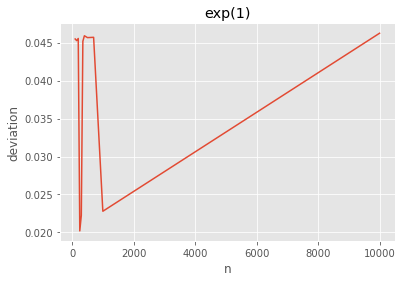

[0.04547416956429903, 0.045256709240500695, 0.04554120954075098, 0.020204277591200633, 0.022254130474024875, 0.045166907049891486, 0.045896312184084236, 0.04565337600218259, 0.045691681121658785, 0.022792764975862644, 0.04622770921291272]


In [47]:
sups = []
nlist = [100, 150, 200, 250, 300, 350, 400, 500, 700, 1000, 10000]
for n in nlist:
    a = 1
    sigma = 1
    sup = np.max([abs(stat.gamma(n, scale = 1).cdf(x * sigma * m.sqrt(n) + n * a) - stat.norm().cdf(x))\
                    for x in np.linspace(-m.sqrt(n), 5*m.sqrt(n), 3 * m.floor(m.sqrt(n)))])
    
    sups.append(sup * m.sqrt(n) *  sigma  * m.e / (2 * (6 - m.e)))
        
plt.plot(nlist, sups)
plt.xlabel('n')
plt.ylabel('deviation')
plt.title('exp(1)')
plt.show()
print(sups)

# 4
Gamma(k, 1)

$a = k$

$\sigma^2 = k$

${\bf E} |\xi_1 - a|^3 = (1/(e Gamma[3 + k]))(10 - 4 k + 2 k^2 + e Gamma[3 + k] - 
  2 e k Gamma[3 + k] - e k^3 Gamma[3 + k] - 2 e Gamma[3 + k, 1] + 
  4 e k Gamma[3 + k, 1] + 2 e k^3 Gamma[3 + k, 1])$ 
  
 $=1 - 2 k - k^3 + \dfrac{(
 2 (5 - 2 k + k^2 + E (-1 + 2 k + k^3) Gamma[3 + k, 1]))}{(
 E Gamma[3 + k])}$


# 5
Laplace(1)

# 6
t(k)

# 7
Смесь нормальных

# 8
Weibull(k, $\lambda$)